This project will involve some webscraping from a site that provides the percentage of samples collected from the 16 Personalities Foundation. Personality max also included their own statistic as well

In [140]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import requests
URL = "https://personalitymax.com/personality-types/population-gender/"
r = requests.get(URL)
print(r.content)

b'<!DOCTYPE html>\r\n<html lang="en-US">\r\n<head>\r\n<meta charset="UTF-8">\r\n<meta name="viewport" content="width=device-width, initial-scale=1">\r\n<link rel="profile" href="https://gmpg.org/xfn/11">\r\n\r\n\r\n<!-- Global site tag (gtag.js) - Google Analytics -->\r\n<!-- <script async src="https://www.googletagmanager.com/gtag/js?id=UA-857191-15"></script>\r\n<script>\r\n\r\nwindow.dataLayer = window.dataLayer || [];\r\n\r\nfunction gtag() {\r\n  dataLayer.push( arguments );\r\n}\r\n\r\ngtag( \'js\', new Date() );\r\n\r\ngtag( \'config\', \'UA-857191-15\' );\r\n\r\n</script> --!>\r\n\r\n\t<script>!function(){"use strict";for(var t=window.location.search.substring(1).split("&"),e=0;e<t.length;e++){var i="adt_ei",a=t[e];if(0===a.indexOf(i)){var r=a.split(i+"=")[1];localStorage.setItem(i,r),t.splice(e,1),history.replaceState(null,"","?"+t.join("&"));break}}}();\n</script>\t\t<style type="text/css">\r\n\t\t\t\t\t.heateor_sss_button_instagram span.heateor_sss_svg,a.heateor_sss_instagra

In [3]:
from bs4 import BeautifulSoup
soup = BeautifulSoup(r.content, 'html5lib') # If this line causes an error, run 'pip install html5lib' or install html5lib
print(soup.prettify())

<!DOCTYPE html>
<html lang="en-US">
 <head>
  <meta charset="utf-8"/>
  <meta content="width=device-width, initial-scale=1" name="viewport"/>
  <link href="https://gmpg.org/xfn/11" rel="profile"/>
  <!-- Global site tag (gtag.js) - Google Analytics -->
  <!-- <script async src="https://www.googletagmanager.com/gtag/js?id=UA-857191-15"></script>
<script>

window.dataLayer = window.dataLayer || [];

function gtag() {
  dataLayer.push( arguments );
}

gtag( 'js', new Date() );

gtag( 'config', 'UA-857191-15' );

</script> -->
  <script>
   !function(){"use strict";for(var t=window.location.search.substring(1).split("&"),e=0;e<t.length;e++){var i="adt_ei",a=t[e];if(0===a.indexOf(i)){var r=a.split(i+"=")[1];localStorage.setItem(i,r),t.splice(e,1),history.replaceState(null,"","?"+t.join("&"));break}}}();
  </script>
  <style type="text/css">
   .heateor_sss_button_instagram span.heateor_sss_svg,a.heateor_sss_instagram span.heateor_sss_svg{background:radial-gradient(circle at 30% 107%,#fdf497

In [4]:
html_table = soup.find_all('table')

In [5]:
print(html_table[0])

<table>
<tbody>
<tr>
<td><strong>Personality Type</strong></td>
<td><strong>16 Personalities Percentage</strong></td>
</tr>
<tr>
<td><strong>INTJ</strong></td>
<td>2.1%</td>
</tr>
<tr>
<td><strong>INTP</strong></td>
<td>3.3%</td>
</tr>
<tr>
<td><strong>ENTJ</strong></td>
<td>1.8%</td>
</tr>
<tr>
<td><strong>ENTP</strong></td>
<td>3.2%</td>
</tr>
<tr>
<td><strong>INFJ</strong></td>
<td>1.5%</td>
</tr>
<tr>
<td><strong>INFP</strong></td>
<td>4.4%</td>
</tr>
<tr>
<td><strong>ENFJ</strong></td>
<td>2.5%</td>
</tr>
<tr>
<td><strong>ENFP</strong></td>
<td>8.1%</td>
</tr>
<tr>
<td><strong>ISTJ</strong></td>
<td>11.6%</td>
</tr>
<tr>
<td><strong>ISFJ</strong></td>
<td>13.8%</td>
</tr>
<tr>
<td><strong>ESTJ</strong></td>
<td>8.7%</td>
</tr>
<tr>
<td><strong>ESFJ</strong></td>
<td>12%</td>
</tr>
<tr>
<td><strong>ISTP</strong></td>
<td>5.4%</td>
</tr>
<tr>
<td><strong>ISFP</strong></td>
<td>8.8%</td>
</tr>
<tr>
<td><strong>ESTP</strong></td>
<td>4.3%</td>
</tr>
<tr>
<td><strong>ESFP</strong></td>

In [6]:
def per_to_float(x):
    return float((x.get_text()).strip('%'))*0.01

In [7]:
dataframe_list = []

web_column = [html_table[0].find_all('td')[0].get_text()]
for num in range(len(html_table)):
    values = []
    for i,rows in enumerate(html_table[num].find_all('tr')):
        row_list = []
        row = rows.find_all('td')
        for j,cell in enumerate(row):
            if j == 0 or i == 0:
                row_list.append(cell.get_text())
            else:
                row_list.append(per_to_float(cell))
        values.append(row_list)
    df = pd.DataFrame(values)
    df.rename(columns=df.iloc[0], inplace = True)
    df.drop(df.index[0], inplace = True)
    dataframe_list.append(df)



In [8]:
for i in range(len(dataframe_list)):
    print(dataframe_list[i])

   Personality Type 16 Personalities Percentage
1              INTJ                       0.021
2              INTP                       0.033
3              ENTJ                       0.018
4              ENTP                       0.032
5              INFJ                       0.015
6              INFP                       0.044
7              ENFJ                       0.025
8              ENFP                       0.081
9              ISTJ                       0.116
10             ISFJ                       0.138
11             ESTJ                       0.087
12             ESFJ                        0.12
13             ISTP                       0.054
14             ISFP                       0.088
15             ESTP                       0.043
16             ESFP                       0.085
  SJ Temperament Type 16 Personalities Statistics pMax Statistics
1                ESTJ                       0.087           0.045
2                ESFJ                        0.12   

In [9]:
pers_stat = pd.concat(dataframe_list[1:4])

In [10]:
pers_stat

,SJ Temperament Type,16 Personalities Statistics,pMax Statistics,SP Temperament Type,NT Temperament Type
1,ESTJ,0.087,0.045,NaN,NaN
2,ESFJ,0.12,0.023,NaN,NaN
3,ISTJ,0.116,0.086,NaN,NaN
4,ISFJ,0.138,0.028,NaN,NaN
1,NaN,0.043,0.032,ESTP,NaN
2,NaN,0.085,0.029,ESFP,NaN
3,NaN,0.054,0.051,ISTP,NaN
4,NaN,0.088,0.028,ISFP,NaN
1,NaN,0.018,0.04,NaN,ENTJ
2,NaN,0.032,0.066,NaN,ENTP


In [11]:
pers_stat = pers_stat.iloc[:,[0,3,4,1,2]]
pers_stat['Type'] = pers_stat[pers_stat.columns[0:3]].apply(
    lambda x: ''.join(x.dropna().astype(str)),
    axis=1
)
pers_stat = pers_stat.iloc[:,[5,3,4]].reset_index(drop = True)

C:\Users\agbol\AppData\Local\Temp\ipykernel_17000\4264286752.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pers_stat['Type'] = pers_stat[pers_stat.columns[0:3]].apply(


In [12]:
pers_stat

,Type,16 Personalities Statistics,pMax Statistics
0,ESTJ,0.087,0.045
1,ESFJ,0.12,0.023
2,ISTJ,0.116,0.086
3,ISFJ,0.138,0.028
4,ESTP,0.043,0.032
5,ESFP,0.085,0.029
6,ISTP,0.054,0.051
7,ISFP,0.088,0.028
8,ENTJ,0.018,0.04
9,ENTP,0.032,0.066


In [14]:
pers_stat.to_csv('pers_stat.csv',index = False) #save for SQL

Notice we only have 12 personality traits when there are 16 personality traits. We will make a linear model to predict the other 4 personality traits.

Let $A^*$ be the matrix that consists of known personality traits, $A$ be the matrix that consists of all personality traits, $y^*$ be the known pMax statistics, and $x$ be the coefficient of the linear regression. Hence, we want

$$\arg \ \min \limits_{x} \left \{ \lvert \lvert A^*x - y^* \rvert \rvert_2^2 \right\} \text{ with } \lvert \lvert Ax \rvert\rvert_1 = 1$$

The set of vectors $x$ where $\lvert \lvert Ax \rvert \rvert_1 = 1$ is not a convex set. So we will update out minimization problem as follows

$$\arg \min \limits_{x} \left \{ \lvert \lvert A^*x - y^* \rvert \rvert_2^2 + \lambda\lvert \lvert Ax \rvert \rvert_1 - \lambda \right\}$$

This minimization problem can be solved using the LASSO algorithm.

where we can set $z = Ax$ or in proper notation $Ax - z = 0$. We will solve using scaled ADMM (Alternating Direction Method of Multipliers)
We can set this as a Lagrange multiplier:
$$L_\rho(x,z,u) = \left(\frac{1}{2} \lvert \lvert A^*x-y^* \rvert \rvert_2^2+ \lvert \lvert z \rvert \rvert_1 + \frac{1}{2}\rho \lvert \lvert Ax - z+ u \rvert \rvert_2^2\right)$$

The first step of the minimizer is
$$x_{k+1} = \arg \ \min \limits_{x} L_\rho(x,z_k,u_k)$$
$$= \arg \ \min \limits_{x} \left(\frac{1}{2} (A^*x - y)^T(A^*x-y) + \frac{1}{2}\rho (Ax - z_{k} + u_k)^T(Ax - z_{k} + u_k) \right)$$
$$= \arg \ \min \limits_{x} \left(\frac{1}{2}\left[ x^T(A^{*})^T A^*x - 2x^T(A^*)^Ty + y^Ty \right] + \frac{1}{2}\rho \left[x^TA^TAx + z^Tz + u_k^Tu_k -2x^TA^T(z_k - u_k) -2z_k^Tu_k \right] \right)$$


The solution to this minimizer can be found can simply taking derivatives
$$\frac{\delta}{\delta x}\left(\frac{1}{2}\left[ x^T(A^{*})^T A^*x - 2x^T(A^*)^Ty + (y^*)^Ty^* \right] + \frac{1}{2}\rho \left[x^TA^TAx + z^Tz + u_k^Tu_k -2x^TA^T(z_k - u_k) -2z_k^Tu_k \right] \right) = 0$$
$$(A^*)^TA^*x_{k+1} - (A^*)^Ty^* + \rho(A^TAx_{k+1} - A^T(z_k - u_k)) = 0$$
$$((A^*)^TA^* + \rho A^TA)x_{k+1} = (A^*)^Ty^* + \rho A^T(z-u_k)$$


$$x_{k+1} =((A^*)^TA^* + \rho A^TA)^{-1}\left[(A^*)^Ty^* + \rho A^T(z-u_k)\right] $$



The second step of the minimizer is
$$z_{k+1} = \arg \ \min \limits_{z} L_\rho(x_{k+1},z,u_k)$$

$$=\arg \ \min \limits_{z} \left[\lambda \lvert \lvert z \rvert \rvert_1 + \frac{\rho}{2} \lvert \lvert Ax_{k+1} - z + u_k \rvert \rvert_2^2 \right]$$
$$=\arg \ \min \limits_{z}\left[ \lambda \lvert \lvert z \rvert \rvert_1 + \frac{\rho}{2} \lvert \lvert z-(Ax_{k+1} +u_k) \rvert \rvert_2^2 \right]$$
$$=\arg \ \min \limits_{z} \left[\lvert \lvert z \rvert \rvert_1 + \frac{\rho}{2 \lambda} \lvert \lvert z-(Ax_{k+1} +u_k) \rvert \rvert_2^2\right]$$
$$=\arg \ \min \limits_{z} \left[\lvert \lvert z \rvert \rvert_1 + \frac{1}{(2 \lambda/\rho)} \lvert \lvert z-(Ax_{k+1} +u_k) \rvert \rvert_2^2 \right] = S_{\lambda/\rho}(Ax_{k+1} + u_k)$$
where
$$S_{\alpha}(x) = \begin{cases} 
x_i - \alpha & \text{if $x_i > \alpha$}\\
0 & \text{if $\lvert x_i \rvert \le \alpha$}\\
x_i + \alpha & \text{if $x_i < -\alpha$}
\end{cases} $$


The third step of the minimizer is
$$u_{k+1} = u_k + Ax_{k+1} -z $$

In [120]:
def x_minimizer(A,A_1,y,x,z,u,rho):
#A_1 is A^*
    temp1 = np.linalg.inv(np.matmul(np.transpose(A_1),A_1) + rho*np.matmul(np.transpose(A),A))
    temp2 = np.matmul(np.transpose(A),rho*(z-u)) + np.matmul(np.transpose(A_1),y)
    return np.matmul(temp1,temp2)



def soft_thresholding(x,alpha):
    if x > alpha:
        return x - alpha
    elif x <-alpha:
        return x+alpha
    else:
        return 0
S_alpha = np.vectorize(soft_thresholding)

def LASSO(A,A_1,y,x,z,u,lamb, rho,k):
    for i in range(1,k):
        x = x_minimizer(A,A_1,y,x,z,u,rho)
        z = S_alpha(np.matmul(A,x)+u,lamb/rho)
        u = u + np.matmul(A,x) - z
    return [A,x,np.linalg.norm(np.matmul(A_1,x) - y),np.linalg.norm(np.matmul(A,x),1)]

In [173]:
#Turn personality type into numerical data
pers_stat["Dim1"] = pers_stat["Type"].apply(lambda x: 0 if "I" in x else 1)
pers_stat["Dim2"] = pers_stat["Type"].apply(lambda x: 0 if "N" in x else 1)
pers_stat["Dim3"] = pers_stat["Type"].apply(lambda x: 0 if "T" in x else 1)
pers_stat["Dim4"] = pers_stat["Type"].apply(lambda x: 0 if "P" in x else 1)

In [174]:
pers_stat

,Type,16 Personalities Statistics,pMax Statistics,Dim1,Dim2,Dim3,Dim4
0,ESTJ,0.087,0.045,1,1,0,1
1,ESFJ,0.12,0.023,1,1,1,1
2,ISTJ,0.116,0.086,0,1,0,1
3,ISFJ,0.138,0.028,0,1,1,1
4,ESTP,0.043,0.032,1,1,0,0
5,ESFP,0.085,0.029,1,1,1,0
6,ISTP,0.054,0.051,0,1,0,0
7,ISFP,0.088,0.028,0,1,1,0
8,ENTJ,0.018,0.04,1,0,0,1
9,ENTP,0.032,0.066,1,0,0,0


In [194]:
A_1 = pers_stat[['Dim1','Dim2','Dim3','Dim4','16 Personalities Statistics']].to_numpy(dtype = 'float')
A_1

array([[1.   , 1.   , 0.   , 1.   , 0.087],
       [1.   , 1.   , 1.   , 1.   , 0.12 ],
       [0.   , 1.   , 0.   , 1.   , 0.116],
       [0.   , 1.   , 1.   , 1.   , 0.138],
       [1.   , 1.   , 0.   , 0.   , 0.043],
       [1.   , 1.   , 1.   , 0.   , 0.085],
       [0.   , 1.   , 0.   , 0.   , 0.054],
       [0.   , 1.   , 1.   , 0.   , 0.088],
       [1.   , 0.   , 0.   , 1.   , 0.018],
       [1.   , 0.   , 0.   , 0.   , 0.032],
       [0.   , 0.   , 0.   , 1.   , 0.021],
       [0.   , 0.   , 0.   , 0.   , 0.033]])

In [180]:
pers_stat_16 = dataframe_list[0]
pers_stat_16["Dim1"] = pers_stat_16["Personality Type"].apply(lambda x: 0 if "I" in x else 1)
pers_stat_16["Dim2"] = pers_stat_16["Personality Type"].apply(lambda x: 0 if "N" in x else 1)
pers_stat_16["Dim3"] = pers_stat_16["Personality Type"].apply(lambda x: 0 if "T" in x else 1)
pers_stat_16["Dim4"] = pers_stat_16["Personality Type"].apply(lambda x: 0 if "P" in x else 1)

In [181]:
pers_stat_16

,Personality Type,16 Personalities Percentage,Dim1,Dim2,Dim3,Dim4
1,INTJ,0.021,0,0,0,1
2,INTP,0.033,0,0,0,0
3,ENTJ,0.018,1,0,0,1
4,ENTP,0.032,1,0,0,0
5,INFJ,0.015,0,0,1,1
6,INFP,0.044,0,0,1,0
7,ENFJ,0.025,1,0,1,1
8,ENFP,0.081,1,0,1,0
9,ISTJ,0.116,0,1,0,1
10,ISFJ,0.138,0,1,1,1


In [195]:
A = pers_stat_16[['Dim1','Dim2','Dim3','Dim4','16 Personalities Percentage']].to_numpy('float')
A

array([[0.   , 0.   , 0.   , 1.   , 0.021],
       [0.   , 0.   , 0.   , 0.   , 0.033],
       [1.   , 0.   , 0.   , 1.   , 0.018],
       [1.   , 0.   , 0.   , 0.   , 0.032],
       [0.   , 0.   , 1.   , 1.   , 0.015],
       [0.   , 0.   , 1.   , 0.   , 0.044],
       [1.   , 0.   , 1.   , 1.   , 0.025],
       [1.   , 0.   , 1.   , 0.   , 0.081],
       [0.   , 1.   , 0.   , 1.   , 0.116],
       [0.   , 1.   , 1.   , 1.   , 0.138],
       [1.   , 1.   , 0.   , 1.   , 0.087],
       [1.   , 1.   , 1.   , 1.   , 0.12 ],
       [0.   , 1.   , 0.   , 0.   , 0.054],
       [0.   , 1.   , 1.   , 0.   , 0.088],
       [1.   , 1.   , 0.   , 0.   , 0.043],
       [1.   , 1.   , 1.   , 0.   , 0.085]])

In [196]:
y = pers_stat[['pMax Statistics']].to_numpy('float')
y

array([[0.045],
       [0.023],
       [0.086],
       [0.028],
       [0.032],
       [0.029],
       [0.051],
       [0.028],
       [0.04 ],
       [0.066],
       [0.078],
       [0.119]])

Text(0.5, 0, 'Number of iterations')

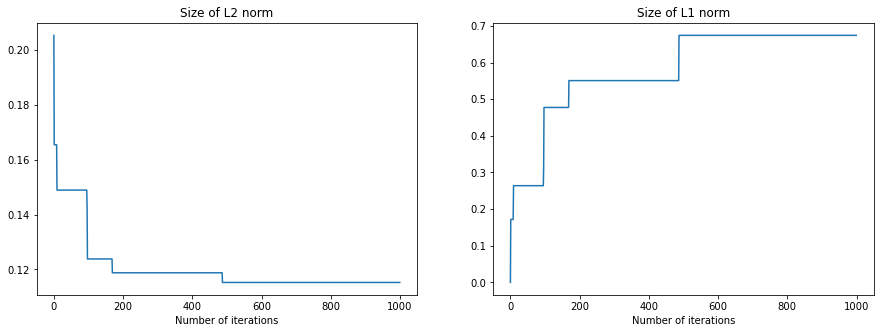

In [279]:
import random

ncol = np.shape(A)[1]
nrow = np.shape(A)[0]

score_l1 = []
score_l2 = []
total_iter = 0
answerl2 = 100
answerl1 = 100
while (total_iter < 1000):
    
    #set initial values
    x_init = np.random.rand(ncol,1)
    z_init = np.random.rand(nrow,1)
    u_init = np.random.rand(nrow,1)
    lamb = np.random.rand(1)
    rho = np.random.rand(1)
    
    #do LASSO algorithm
    answer = LASSO(A,A_1,y,x_init,z_init,u_init,lamb,rho,1000)
    total_iter += 1
    if not np.isnan(answertemp):
        #Choose 
        if (answer[2] < answerl2) and (abs(answer[3] -1) < abs(answerl1 - 1)):
                answerl2 = answer[2]
                answerl1 = answer[3]
                lamb_sol = lamb
                rho_sol = rho
                x_sol = answer[1]
    score_l1.append(answerl1)
    score_l2.append(answerl2)

plt.figure(figsize=(15,5))
plt.subplot(121)
plt.plot(score_l2)
plt.title("Size of L2 norm")
plt.xlabel("Number of iterations")
plt.subplot(122)
plt.plot(score_l1)
plt.title("Size of L1 norm")
plt.xlabel("Number of iterations")



In [280]:
np.linalg.norm(np.matmul(A_1,x_sol))

0.16894886898540737

In [281]:
np.linalg.norm(np.matmul(A,x_sol),1)

0.674152564244348

In [274]:
print(lamb_sol,rho_sol)

[0.00082312] [0.55714652]


In [282]:
np.matmul(A_1,x_sol),y

(array([[ 0.06884668],
        [ 0.04314846],
        [ 0.09898564],
        [ 0.0556717 ],
        [ 0.02162438],
        [ 0.01033901],
        [ 0.02293763],
        [-0.00115917],
        [ 0.02188763],
        [ 0.06754817],
        [ 0.01038945],
        [ 0.05284713]]),
 array([[0.045],
        [0.023],
        [0.086],
        [0.028],
        [0.032],
        [0.029],
        [0.051],
        [0.028],
        [0.04 ],
        [0.066],
        [0.078],
        [0.119]]))